### Netflix Content Trends Analysis (2008–2021)
A data-driven exploration of how Netflix’s content library evolved across countries, genres, and formats (Movies vs. TV Shows).

In [2]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set a consistent, professional style for all plots
sns.set_style('whitegrid')
sns.set_palette('crest')

# Load the dataset
df = pd.read_csv('Netflix Dataset.csv')

In [3]:
# Convert Release_Date to datetime, handling potential errors
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df.dropna(subset=['Release_Date'], inplace=True) # Drop rows where conversion failed

# Create the 'Year' column and convert to integer
df['Year'] = df['Release_Date'].dt.year
df['Year'] = df['Year'].astype(int)

# Handle missing values using the organization's better method
df['Director'] = df['Director'].fillna("Unknown")
df['Cast'] = df['Cast'].fillna("Unknown")
df['Country'] = df['Country'].fillna("Unknown")
df['Rating'] = df['Rating'].fillna("Not Rated") # Fills instead of dropping

print("--- Data Cleaning Complete ---")
df.info()

--- Data Cleaning Complete ---
<class 'pandas.core.frame.DataFrame'>
Index: 7691 entries, 0 to 7788
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7691 non-null   object        
 1   Category      7691 non-null   object        
 2   Title         7691 non-null   object        
 3   Director      7691 non-null   object        
 4   Cast          7691 non-null   object        
 5   Country       7691 non-null   object        
 6   Release_Date  7691 non-null   datetime64[ns]
 7   Rating        7691 non-null   object        
 8   Duration      7691 non-null   object        
 9   Type          7691 non-null   object        
 10  Description   7691 non-null   object        
 11  Year          7691 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 781.1+ KB


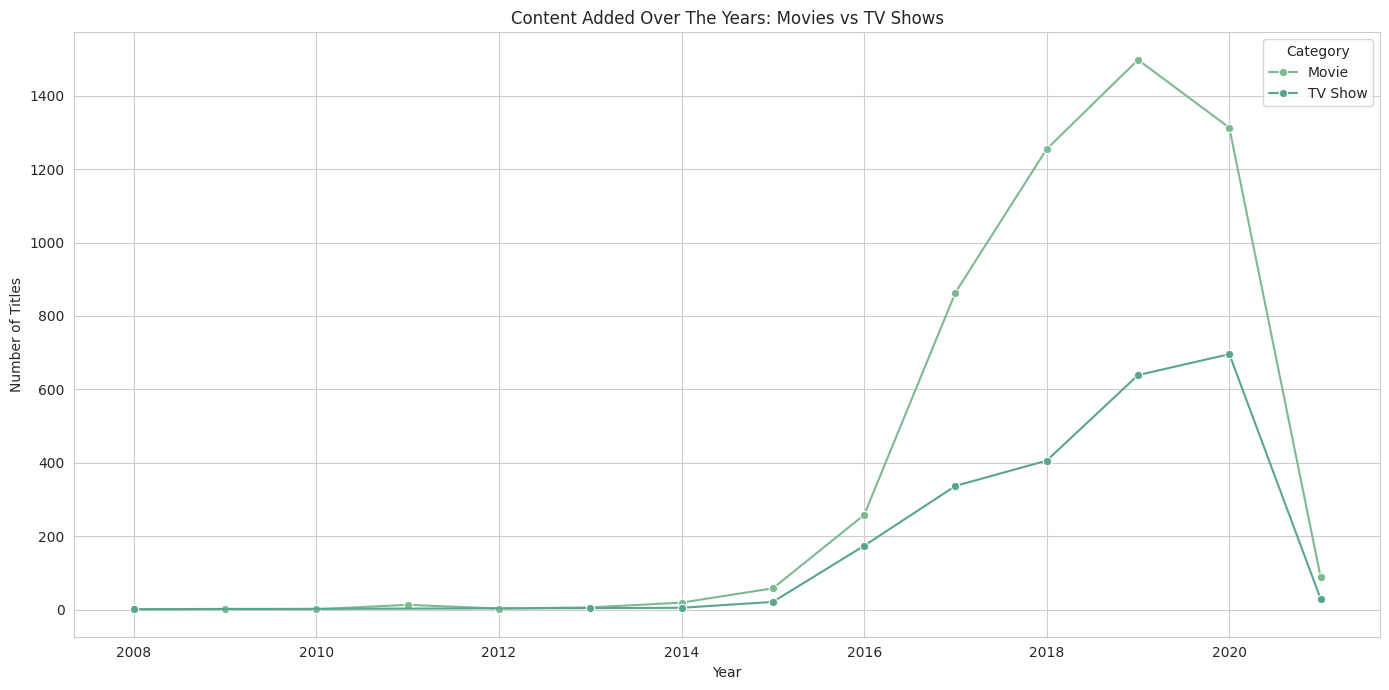

In [4]:
content_trend = df.groupby(['Year', 'Category']).size().reset_index(name='Count')

plt.figure(figsize=(14, 7))
sns.lineplot(data=content_trend, x='Year', y='Count', hue='Category', marker='o')
plt.title("Content Added Over The Years: Movies vs TV Shows")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend(title="Category")
plt.tight_layout()
plt.show()

/tmp/ipython-input-2054344198.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


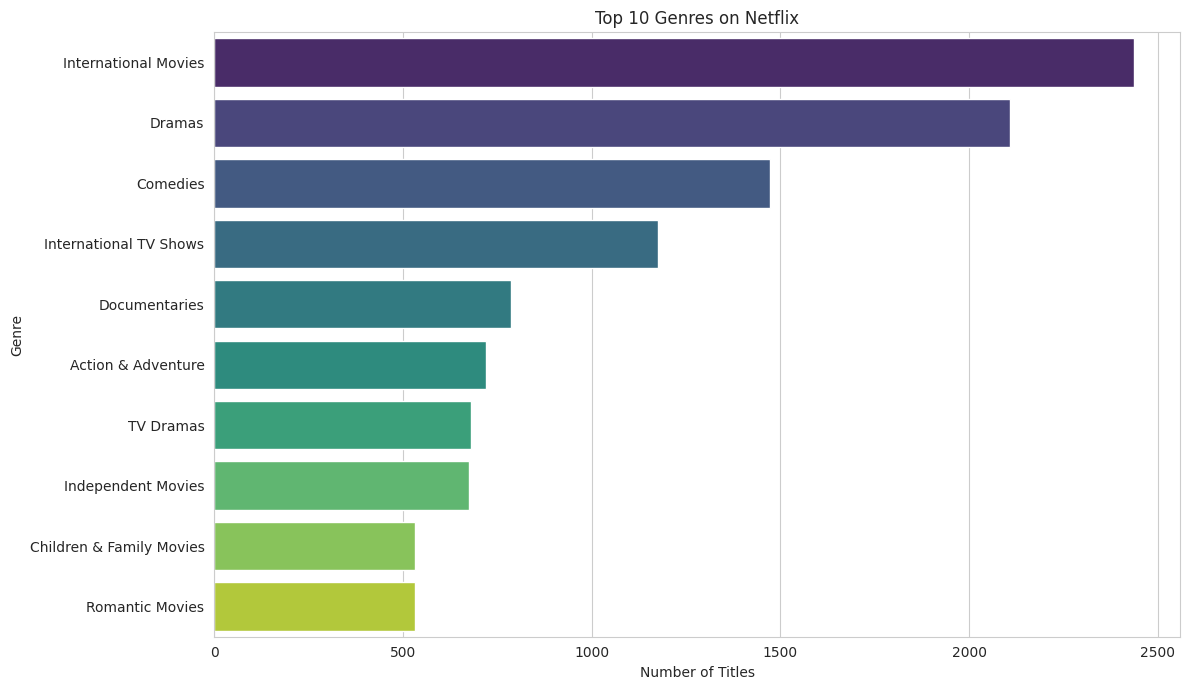

In [5]:
# Use the 'Type' column and explode it for accurate genre counting
genres = df['Type'].str.split(', ').explode()
top_genres = genres.value_counts().head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

/tmp/ipython-input-3518586617.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries_df, x='Count', y='Country', palette="crest")


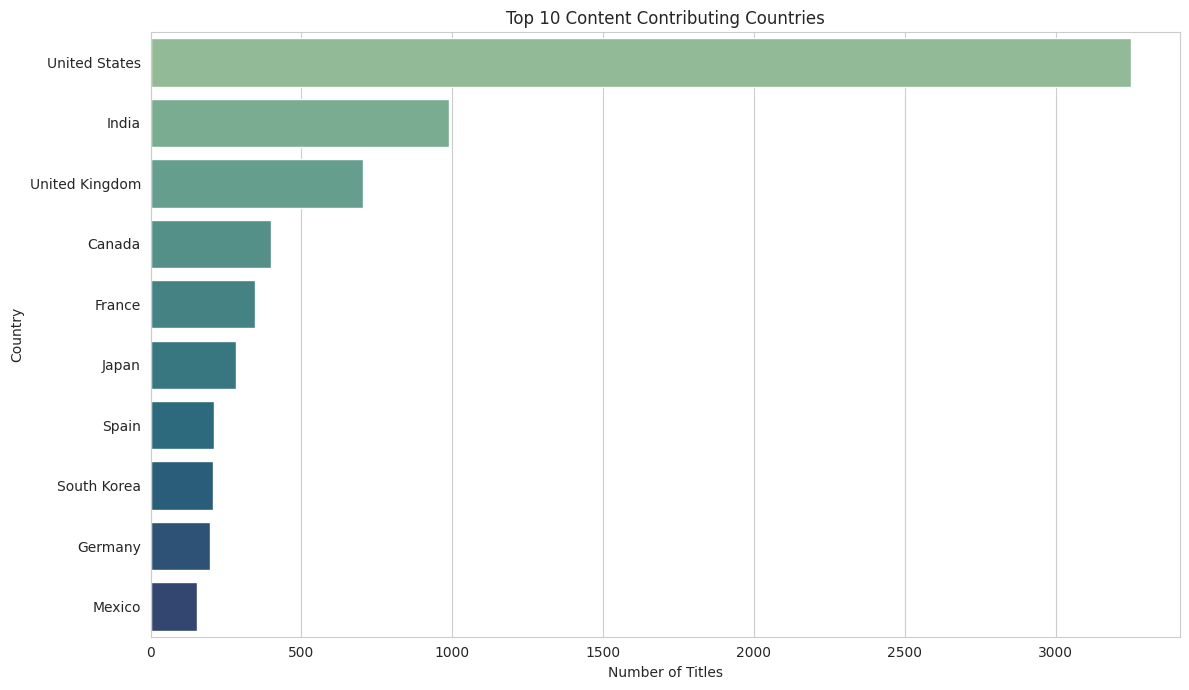

In [6]:
# Explode the 'Country' column for accurate counting
countries = df[df['Country'] != 'Unknown']['Country'].str.split(', ').explode()
top_countries_df = countries.value_counts().head(10).reset_index()
top_countries_df.columns = ['Country', 'Count']

plt.figure(figsize=(12, 7))
sns.barplot(data=top_countries_df, x='Count', y='Country', palette="crest")
plt.title('Top 10 Content Contributing Countries')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

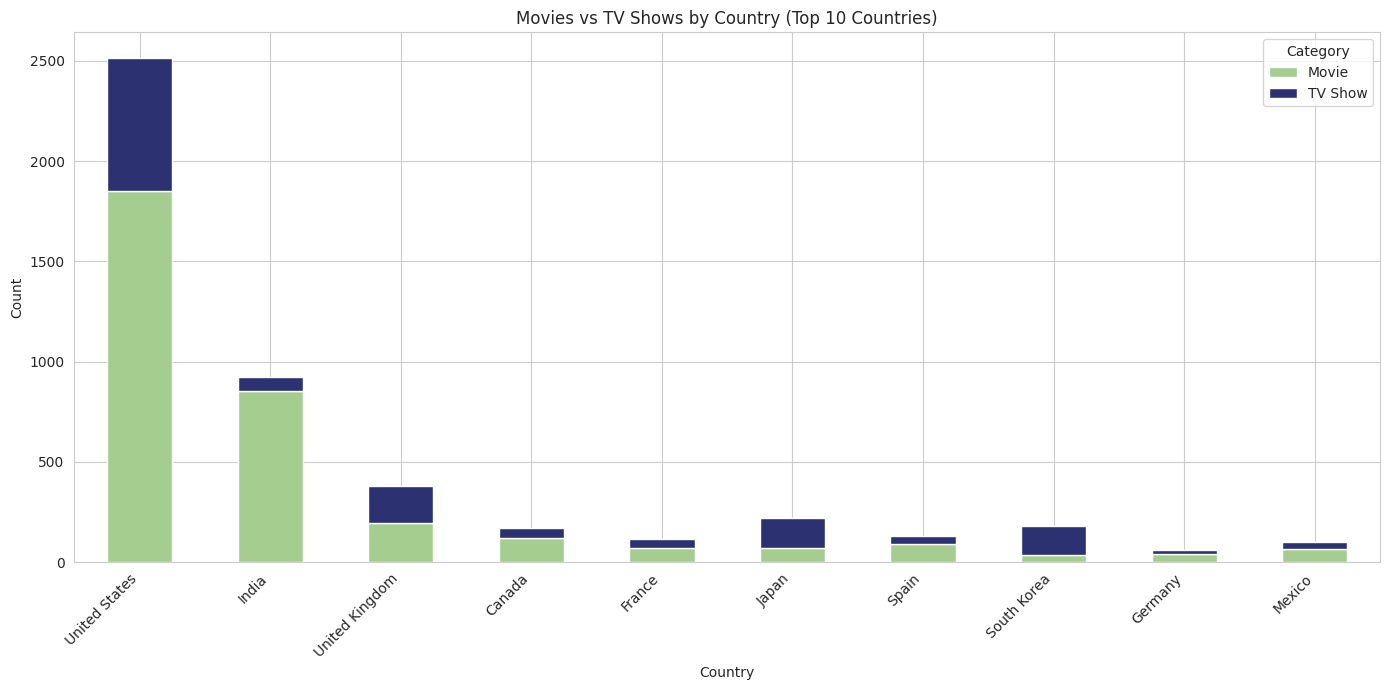

In [7]:
# Filter data for only the top 10 countries
top_10_country_names = top_countries_df['Country'].tolist()
country_data = df[df['Country'].isin(top_10_country_names)]

# Create the stacked bar plot
stacked = country_data.groupby(['Country', 'Category']).size().unstack(fill_value=0)
stacked_sorted = stacked.loc[top_10_country_names] # Keep the original sort order

stacked_sorted.plot(kind='bar', stacked=True, figsize=(14,7), colormap="crest")
plt.title("Movies vs TV Shows by Country (Top 10 Countries)")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
country_counts = countries.value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

fig = px.choropleth(country_counts,
                    locations="Country",
                    locationmode="country names",
                    color="Count",
                    hover_name="Country",
                    color_continuous_scale='Viridis',
                    title="Global Distribution of Netflix Content")
fig.show()

## Conclusion & Strategic Recommendations

Based on the analysis, several key trends emerge:

* **Movies Still Dominate, but TV Shows Are Rising:** While movies make up the bulk of Netflix's catalog, the addition of new TV shows has seen a significant and steady increase, indicating a strategic shift towards episodic content.

* **Global Dramas & Comedies are Key:** International Movies, Dramas, and Comedies are the most frequent genres. This highlights a content strategy focused on universally popular categories that can appeal to a global audience.

* **US and India are Top Content Drivers:** The United States is by far the largest contributor to the Netflix library, with India emerging as a strong second. This reflects Netflix's focus on securing its primary market while investing heavily in high-growth international regions.

* **Content is Targeted at Mature Audiences:** The most common ratings are **TV-MA** (Mature Audiences) and **TV-14**, suggesting that a large portion of the catalog is aimed at adults and older teens.

**Strategic Recommendation:** To stay competitive, Netflix should continue its investment in TV shows, particularly in high-performing international markets like India. Focusing on globally popular genres like Dramas and Comedies remains a strong strategy, but there may be opportunities to capture niche audiences in underrepresented genres.